In [48]:
import os
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.ndimage import gaussian_filter

<h2>Загрузка данных</h2><a id="test"></a>

# Извлечение новых данных из файлов с амплитудами 100-1000

In [49]:
folders = os.listdir()

In [50]:
folders

['(10, 0.1, 0.1, 0.9).pdf',
 '(10, 0.1, 2, 0.9).pdf',
 '(10, 0.1, 5, 0.9).pdf',
 '(10, 0.8, 5, 0.9).pdf',
 '(10, 10, 0.1, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 0.1, 0.1, 0.9, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 3, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.8, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 10, 0.1, 0.8, 10, 0.1, 0.6, 0.6).pdf',
 '(100, 10, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.1, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.1, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.8, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(50, 0.1, 0.1, 0.9).pdf',
 '.ipynb_checkpoints',
 '0.pdf',
 '0.png',
 '1.pdf',
 '1.png',
 '100-500_1000_averaged.mat',
 '100.pdf',
 '100.png',
 '1000.pdf',
 '1000.png',
 '1000_metrics.pdf',
 '1000_metrics.png',
 '100_metrics.pdf',
 '100_metrics.png',
 '2.pdf',
 '2.png',
 '200.pdf',
 '200.png',
 '200_metrics.pdf',
 '200_

In [137]:
records=[scipy.io.loadmat(filename) for filename in folders if ("mat" and "100-1000") in filename]

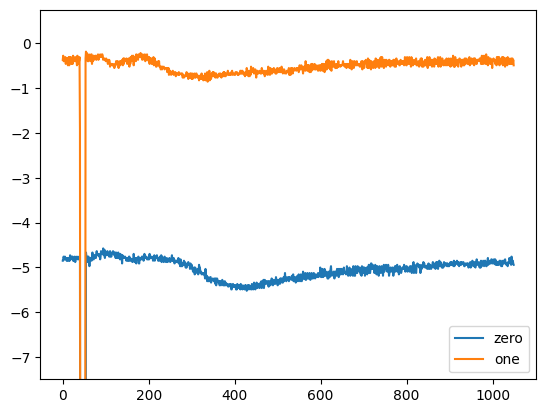

In [143]:
plt.plot(np.transpose(records[1]['Y4'])[0][9950:11000], label="zero")
plt.plot(np.transpose(records[1]['Y4'])[1][9950:11000], label="one")
plt.ylim(bottom=-7.5)
plt.legend()

In [101]:
all_records={}
all_records[100] = []
all_records[200] = []
all_records[300] = []
all_records[400] = []
all_records[500] = []
all_records[600] = []
all_records[700] = []
all_records[800] = []
all_records[900] = []
all_records[1000] = []


amps=["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
updated_recs = []
for i in range(len(records)):
    updated_recs.append({})
    updated_recs[i]["Y1"] = []
    updated_recs[i]["Y2"] = []
    updated_recs[i]["Y3"] = []
    updated_recs[i]["Y4"] = []
    updated_recs[i]["Y5"] = []
    updated_recs[i]["Y6"] = []
    updated_recs[i]["Y7"] = []
    updated_recs[i]["Y8"] = []
    updated_recs[i]["Y9"] = []
    updated_recs[i]["Y10"] = []

for rec, ind in zip(records, range(len(records))):
    for key, value in rec.items():
        if key in amps:
            updated_recs[ind][key].append(value)
    
for rec in updated_recs:
    for (key, value), ind in zip(rec.items(), range(10)):
        tmp = np.transpose(value)
        if key in amps:
            all_records[100+ind*100].append(tmp)

# Извлечение новых данных из файлов с амплитудами 100-500_1000

In [102]:
folders = os.listdir()

In [103]:
folders

['(10, 0.1, 0.1, 0.9).pdf',
 '(10, 0.1, 2, 0.9).pdf',
 '(10, 0.1, 5, 0.9).pdf',
 '(10, 0.8, 5, 0.9).pdf',
 '(10, 10, 0.1, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 0.1, 0.1, 0.9, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 3, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.8, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 10, 0.1, 0.8, 10, 0.1, 0.6, 0.6).pdf',
 '(100, 10, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.1, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.1, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.8, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(50, 0.1, 0.1, 0.9).pdf',
 '.ipynb_checkpoints',
 '0.pdf',
 '0.png',
 '1.pdf',
 '1.png',
 '100-500_1000_averaged.mat',
 '100.pdf',
 '100.png',
 '1000.pdf',
 '1000.png',
 '1000_metrics.pdf',
 '1000_metrics.png',
 '100_metrics.pdf',
 '100_metrics.png',
 '2.pdf',
 '2.png',
 '200.pdf',
 '200.png',
 '200_metrics.pdf',
 '200_

In [104]:
records=[scipy.io.loadmat(filename) for filename in folders if ("mat" and "100-500") in filename]

In [105]:
# plt.plot(records[1]["Y6"][9900:10100])

In [106]:
amp = []
for i, k in records[3]["Y6"][9900:10100]:
    if i<(-10):
        amp.append(i)

In [107]:
len(amp)

12

In [108]:
amps=["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
updated_recs = []
for i in range(len(records)):
    updated_recs.append({})
    updated_recs[i]["Y1"] = []
    updated_recs[i]["Y2"] = []
    updated_recs[i]["Y3"] = []
    updated_recs[i]["Y4"] = []
    updated_recs[i]["Y5"] = []
    updated_recs[i]["Y6"] = []

for rec, ind in zip(records, range(len(records))):
    for key, value in rec.items():
        if key in amps:
            updated_recs[ind][key].append(value)
    
for rec in updated_recs:
    for (key, value), ind in zip(rec.items(), range(6)):
        tmp = np.transpose(value)
        if key=="Y6":
            all_records[1000].append(tmp)
        elif key in amps:
            all_records[100+ind*100].append(tmp)

In [109]:
len(all_records[100])

9

In [110]:
# plt.plot(all_records[100][2][1][5000:15000])
# plt.plot(all_records[100][2][0][5000:15000])

In [111]:
exmapl = scipy.io.loadmat("231222_1_600_1000мкА_h[1-5].mat")

# Извлечение новых данных из файлов с амлитудами 600-1000

In [112]:
folders

['(10, 0.1, 0.1, 0.9).pdf',
 '(10, 0.1, 2, 0.9).pdf',
 '(10, 0.1, 5, 0.9).pdf',
 '(10, 0.8, 5, 0.9).pdf',
 '(10, 10, 0.1, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 0.1, 0.1, 0.9, 0.6).pdf',
 '(10, 10, 0.1, 0.8, 3, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(10, 10, 0.8, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 10, 0.1, 0.8, 10, 0.1, 0.6, 0.6).pdf',
 '(100, 10, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.1, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.1, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.8, 0.1, 0.1, 0.1, 0.6, 0.6).pdf',
 '(100, 100, 0.8, 0.8, 0.1, 0.1, 0.6, 0.6).pdf',
 '(50, 0.1, 0.1, 0.9).pdf',
 '.ipynb_checkpoints',
 '0.pdf',
 '0.png',
 '1.pdf',
 '1.png',
 '100-500_1000_averaged.mat',
 '100.pdf',
 '100.png',
 '1000.pdf',
 '1000.png',
 '1000_metrics.pdf',
 '1000_metrics.png',
 '100_metrics.pdf',
 '100_metrics.png',
 '2.pdf',
 '2.png',
 '200.pdf',
 '200.png',
 '200_metrics.pdf',
 '200_

In [113]:
records600_1000=[scipy.io.loadmat(filename) for filename in folders if ("600" and "mat") in filename]

In [114]:
records600_1000=records600_1000[1:]

In [115]:
amps=["Y1", "Y2", "Y3", "Y4", "Y5"]
updated_recs = []
for i in range(len(records600_1000)):
    updated_recs.append({})
    updated_recs[i]["Y1"] = []
    updated_recs[i]["Y2"] = []
    updated_recs[i]["Y3"] = []
    updated_recs[i]["Y4"] = []
    updated_recs[i]["Y5"] = []

for rec, ind in zip(records600_1000, range(len(records600_1000))):
    for key, value in rec.items():
        if key in amps:
            updated_recs[ind][key].append(value)
    
for rec in updated_recs:
    for (key, value), ind in zip(rec.items(), range(len(rec))):
        tmp = np.transpose(value)
        if key in amps:
            all_records[600+ind*100].append(tmp)

In [116]:
np.save("new_data.npy", all_records)

In [117]:
len(all_records[1000])

24

In [118]:
# plt.plot(all_records[100][0][1][9500:10200], label='ca3')
# plt.plot(all_records[100][0][0][9500:10200], label='ca1')
# plt.legend

In [119]:
len(all_records[1000])

24

# Вывод всех сигналов

In [120]:
# for key in all_records.keys():
#     for rec in all_records[key]:
#         plt.plot(rec[0][:40000], label='ca3')
#         plt.plot(rec[1][:40000], label='ca1')
#         plt.legend()
#         plt.title(f"amp {key}")
#         plt.show()  

In [121]:
print(np.argmin(all_records[100][0][0]))

10002


In [122]:
def smooth(a,WSZ):
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))
def lowpass(signal: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    return scipy.signal.sosfiltfilt(sos, signal)
def removeArts(signal):
    s = signal.copy()
    dg=[]
    min_sig = np.argmin(s)
    for i in range(min_sig-80, min_sig+70):
        dg.append(s[i])
        s[i] = s[i-500]
    s = lowpass(s, 1000, 20000)
    s_mean=s.mean()
    s = standartization(s)
    dg=lowpass(dg, 1000, 20000)
    dg = standartization(np.array(dg))
    s = smooth(s, 11)
    return s, dg, s_mean
def standartization(s, needStd = False):
    if needStd:
        return np.array((s-s.mean())/s.std())
    else:
        return np.array(s-s.mean())
def gausFilter(signal, sigma = 35):
    min1 = np.min(signal)
    gf = gaussian_filter(signal, sigma)
    min2 = np.min(gf)
    return gf*min1/min2
def getca1(signal):
    left = right = np.argmin(signal)
    mean = np.mean(signal)
    while signal[left]<mean and left>0:
        left-=1
    while signal[right]<mean and right<maxlen:
        right+=1
    return [left, right]

In [123]:
def get_preprocessed():
    amps = list(range(100, 1001, 100))
    print(amps)
    ca1 = {}
    ca3 = {}
    wa1 = {}
    wa3 = {}
    dg ={}
    for a in amps:
        ca1[a]=[]
        ca3[a]=[]
        wa1[a] = []
        wa3[a] = []
        dg[a]=[]
    for a in amps:
        for rec in all_records[a]:
            if (len(rec)):
                ca1[a].append(np.reshape(np.array(rec[0][:70000]), (1, 70000)))
                ca3[a].append(np.reshape(np.array(rec[1][:70000]), (1, 70000)))
        
        wa1[a] = np.array([removeArts(record[0])[0] for record in ca1[a]])
        wa3[a]= np.array([removeArts(record[0])[0] for record in ca3[a]])
        dg[a]= np.array([removeArts(record[0])[1] for record in ca3[a]])
    
    
    filt1 = {}
    filt3 = {}
    for a in amps:
        filt1[a]=np.array([gausFilter(rec) for rec in wa1[a]])
        filt3[a]=np.array([gausFilter(rec) for rec in wa3[a]])

    return filt1, filt3, dg

In [124]:
res = get_preprocessed()
res

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


({100: array([[ 9.67149990e-03,  9.64564129e-03,  9.59399798e-03, ...,
           3.13379627e-02,  3.13123863e-02,  3.12995769e-02],
         [-6.46193092e-03, -6.45330177e-03, -6.43605608e-03, ...,
          -7.35784810e-03, -7.36300690e-03, -7.36558431e-03],
         [ 6.65585485e-02,  6.65409855e-02,  6.65058830e-02, ...,
           3.21658879e-02,  3.21775190e-02,  3.21833457e-02],
         ...,
         [ 6.25294010e-02,  6.25200592e-02,  6.25014068e-02, ...,
           5.62122551e-02,  5.61834460e-02,  5.61690364e-02],
         [ 2.15779227e+01,  2.15678995e+01,  2.15478711e+01, ...,
           4.57189341e+01,  4.57230123e+01,  4.57250554e+01],
         [-6.34812637e-04, -6.41568559e-04, -6.55064941e-04, ...,
          -8.06655803e-03, -8.08400465e-03, -8.09274331e-03]]),
  200: array([[ 1.33032735e-03,  1.32302345e-03,  1.30843415e-03, ...,
          -2.70096390e-02, -2.70244148e-02, -2.70318157e-02],
         [ 7.51565673e-05,  6.59777450e-05,  4.76466035e-05, ...,
          -4

In [125]:
# for amp in amps:
#     for sig in res[0][amp]:
#         print(np.argmin(sig))
#         argMin = np.argmin(sig)
#         argMax = np.argmax(sig)
#         minS = np.min(sig)
#         maxS = np.max(sig)
#         ext = maxS if abs(maxS)>abs(minS) else minS
#         argExt = argMax if abs(maxS)>abs(minS) else argMin
#         stdS = np.std(sig)
#         print((abs(maxS)/stdS), abs(minS)/stdS)
#         plt.plot(sig)
#         plt.show()

In [126]:
res[2][100]

array([[ 0.45950924,  0.5141085 ,  0.56626452, ...,  0.67027873,
         0.6690514 ,  0.66803438],
       [ 0.50868386,  0.50613914,  0.50358684, ...,  0.45229137,
         0.44925257,  0.44655369],
       [ 0.98001532,  0.96619078,  0.95272076, ...,  0.99191972,
         0.99843747,  1.00514433],
       ...,
       [ 9.69547236,  9.87905846, 10.04931629, ..., 10.02768323,
        10.09571187, 10.17020633],
       [ 5.89022821,  5.91984515,  5.94299202, ...,  6.74847164,
         6.04922847,  5.32724154],
       [-0.01258186, -0.01174217, -0.01080658, ...,  0.05903418,
         0.06881725,  0.07901621]])

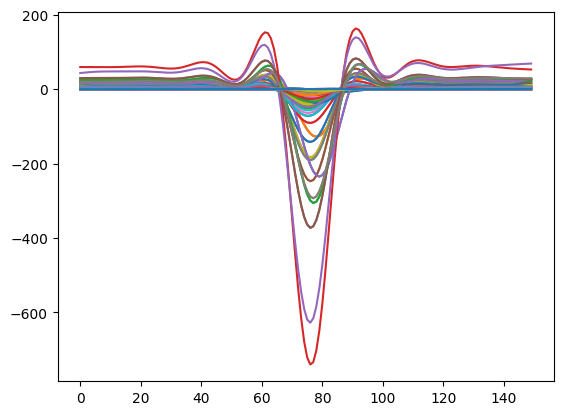

In [127]:
for amp in [100,200,300,400,500,600,700,800,900,1000]:
    for i in res[2][amp]:
        plt.plot(i)

In [128]:
### k=0
# for a in list(range(100,1001, 100)):
#     for i in range(len(res[0][a])):
#         k+=1
#         plt.plot(res[0][a][i])
#         plt.plot(res[1][a][i])
#         plt.title(a)
#         plt.show()
# print(k)

In [129]:
def pick(filt1, filt3, amps, dg_sig):
    ca1Up = {}
    ca1Down = {}
    ca1Both = {}
    ca1None = {}
    dg={}
    for a in amps:
        ca1Up[a] = []
        ca1Down[a] = []
        ca1Both[a] = []
        ca1None[a] = []
        dg[a]=[]
    # for a in amps:
    #     for number in range(len(filt1[a])):
    #         signal = filt1[a][number]
    #         argMin = np.argmin(signal)
    #         argMax = np.argmax(signal)
    #         minS = np.min(signal)
    #         maxS = np.max(signal)
    #         ext = maxS if abs(maxS)>abs(minS) else minS
    #         argExt = argMax if abs(maxS)>abs(minS) else argMin
    #         stdS = np.std(signal)
    #         print("ard ext is", argExt)
    #         print(minS, maxS, stdS)
    #         if argExt>6250 or argExt<5200 or ((maxS-minS)/stdS)<5 or stdS<0.05:
    #             ca1None[a].append(signal)
    #         else:
    #             if (abs(maxS)/stdS)>2 and (abs(minS)/stdS)>2:
    #                 ca1Both[a].append(signal)
    #             else:
    #                 if (abs(maxS)/stdS)>2:
    #                     ca1Up[a].append(signal)
    #                 else: 
    #                     ca1Down[a].append(signal)

    ca3Up = {}
    ca3Down = {}
    ca3Both = {}
    ca3None = {}
    for a in amps:
        ca3Up[a] = []
        ca3Down[a] = []
        ca3Both[a] = []
        ca3None[a] = []
        
    for a in amps:
        for number in range(len(filt3[a])):
            signal3 = filt3[a][number]
            signal1 = filt1[a][number]
            argMin = np.argmin(signal3)
            argMax = np.argmax(signal3)
            minS = np.min(signal3)
            maxS = np.max(signal3)
            ext = maxS if abs(maxS)>abs(minS) else minS
            argExt = argMax if abs(maxS)>abs(minS) else argMin
            stdS = np.std(signal3)
            if argExt>12000 or argExt<10000 or ((maxS-minS)/stdS)<6:
                ca3None[a].append(signal)
            else:
                if (abs(maxS)/stdS)>4 and (abs(minS)/stdS)>4:
                    ca3Both[a].append(signal)
                else:
                    if (abs(maxS)/stdS)>4:
                        ca3Up[a].append(signal)
                    elif (ext < -0.1): 
                        min_1 = np.argmin(signal1)
                        min_3 = np.argmin(signal3)
                        ca3Down[a].append(signal3[min_3-5000:min_3+50000]) 
                        ca1Down[a].append(signal1[min_1-5000:min_1+50000])
                        dg[a].append(dg_sig[a][number])
    print(len(ca3None[200]), len(ca3Both[200]), len(ca3Up[200]), len(ca3Down[200]))
    # ca1Down[1000]=np.delete(ca1Down[1000], 4, axis=0)
    # ca3Down[1000]=np.delete(ca3Down[1000], 4, axis=0)
    # dg[1000]=np.delete(dg[1000], 4, axis=0)
    return ca1Down, ca3Down, dg

In [130]:
# k=0
# for a in list(range(100,1001, 100)):
#     for i in range(len(ares[0][a])):
#         k+=1
#         plt.plot(ares[0][a][i])
#         plt.plot(ares[1][a][i])
#         plt.title(a)
#         plt.show()
# print(k)

In [131]:
res[1][100]

array([[-7.80737552e-02, -7.80736145e-02, -7.80734042e-02, ...,
         4.66052019e-02,  4.61471529e-02,  4.59178876e-02],
       [ 6.67344387e-03,  6.66496142e-03,  6.64800696e-03, ...,
        -2.66904010e-04, -2.68459668e-04, -2.69238306e-04],
       [ 2.07898501e-02,  2.07886264e-02,  2.07861662e-02, ...,
         1.18131470e-02,  1.18206835e-02,  1.18244589e-02],
       ...,
       [ 1.13870085e-01,  1.14035372e-01,  1.14365295e-01, ...,
        -1.73005929e+01, -1.73005252e+01, -1.73004913e+01],
       [-5.80185132e-01, -5.80047262e-01, -5.79772279e-01, ...,
        -4.90774755e+00, -4.91620488e+00, -4.92043898e+00],
       [-1.58713888e-02, -1.58740683e-02, -1.58794258e-02, ...,
         7.80133236e-03,  7.81109670e-03,  7.81598838e-03]])

In [132]:
amps_ = [100,200,300,400,500,600,700,800,900,1000]
ares=pick(res[0], res[1], amps_, res[2])

2 1 1 4


In [133]:
output = {}
output[100]=[]
output[200]=[]
output[300]=[]
output[400]=[]
output[500]=[]
output[600]=[]
output[700]=[]
output[800]=[]
output[900]=[]
output[1000]=[]
amps=list(range(100,1001,100))
for amp in amps:
    for i in range(len(ares[0][amp])):
        output[amp].append([ares[0][amp][i], ares[1][amp][i], ares[2][amp][i]])

In [134]:
def get_output():
    print(1)
    return output

# Загрузка

In [135]:
a = get_output()

1


In [257]:
a

{100: [[array([ 0.01464293,  0.01472198,  0.01480378, ..., -0.01204484,
          -0.01231155, -0.01257549]),
   array([-0.00505199, -0.00512367, -0.00519186, ...,  0.00094831,
           0.00112127,  0.00129547]),
   array([ 0.43368994,  0.43722686,  0.4404238 ,  0.44310749,  0.44515595,
           0.44651303,  0.44719535,  0.44729068,  0.44694787,  0.44635938,
           0.44573843,  0.44529311,  0.44520015,  0.44558112,  0.44648336,
           0.44786776,  0.44960496,  0.45148129,  0.45321493,  0.45448233,
           0.45495365,  0.45433523,  0.45241558,  0.44911058,  0.4445023 ,
           0.43886542,  0.43267556,  0.42659461,  0.42143042,  0.41807081,
           0.41739498,  0.42016893,  0.42693408,  0.43790075,  0.45285947,
           0.47112308,  0.49151155,  0.51238918,  0.53175954,  0.54741879,
           0.55716147,  0.55902625,  0.55156234,  0.53409089,  0.5069314 ,
           0.47156123,  0.43067728,  0.38813417,  0.34874118,  0.31791256,
           0.30117955,  0.30358937,

In [258]:
a[100]

[[array([ 0.01464293,  0.01472198,  0.01480378, ..., -0.01204484,
         -0.01231155, -0.01257549]),
  array([-0.00505199, -0.00512367, -0.00519186, ...,  0.00094831,
          0.00112127,  0.00129547]),
  array([ 0.43368994,  0.43722686,  0.4404238 ,  0.44310749,  0.44515595,
          0.44651303,  0.44719535,  0.44729068,  0.44694787,  0.44635938,
          0.44573843,  0.44529311,  0.44520015,  0.44558112,  0.44648336,
          0.44786776,  0.44960496,  0.45148129,  0.45321493,  0.45448233,
          0.45495365,  0.45433523,  0.45241558,  0.44911058,  0.4445023 ,
          0.43886542,  0.43267556,  0.42659461,  0.42143042,  0.41807081,
          0.41739498,  0.42016893,  0.42693408,  0.43790075,  0.45285947,
          0.47112308,  0.49151155,  0.51238918,  0.53175954,  0.54741879,
          0.55716147,  0.55902625,  0.55156234,  0.53409089,  0.5069314 ,
          0.47156123,  0.43067728,  0.38813417,  0.34874118,  0.31791256,
          0.30117955,  0.30358937,  0.32903215,  0.379

100


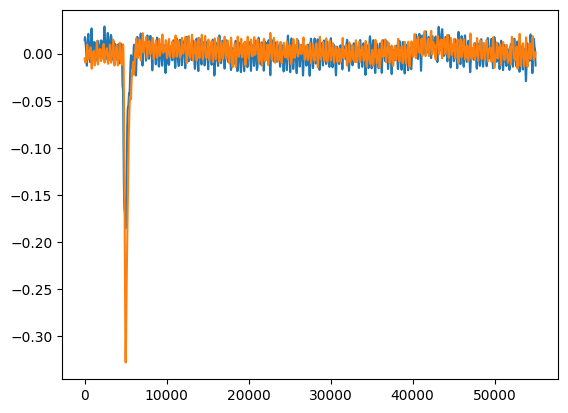

100


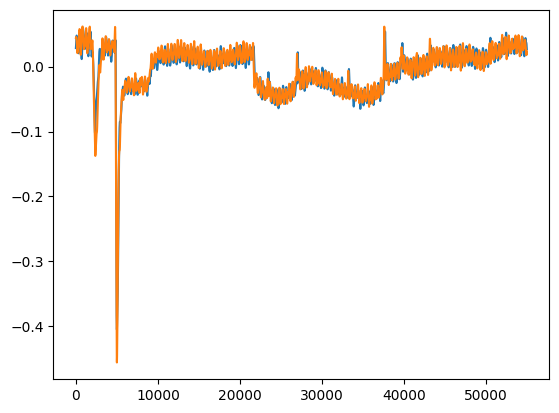

100


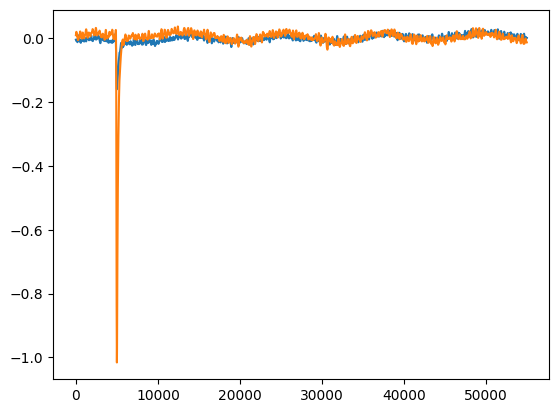

200


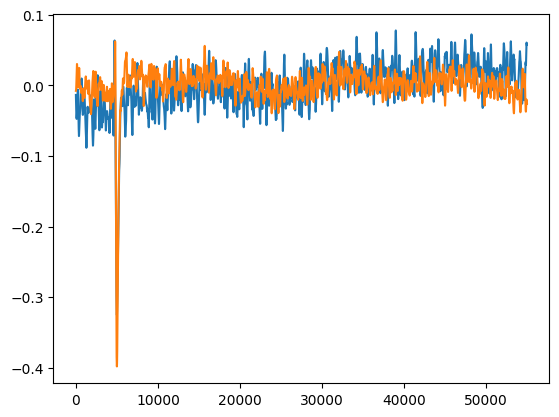

200


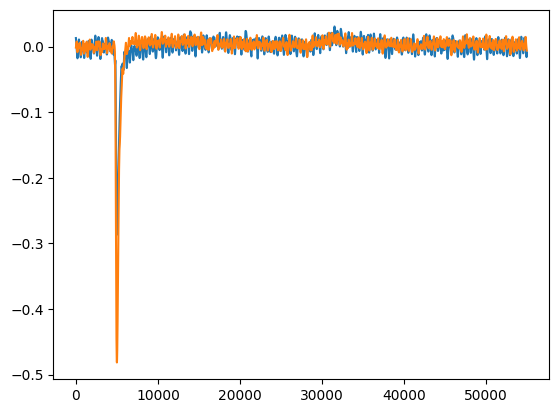

200


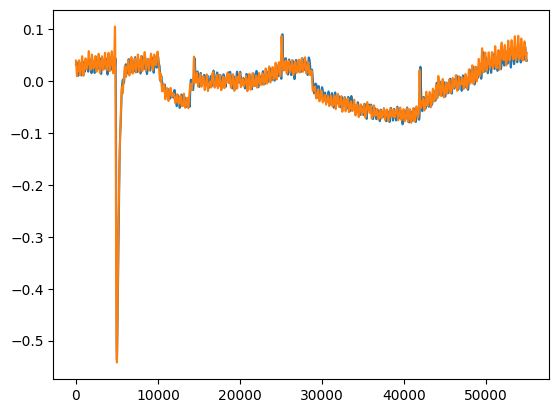

200


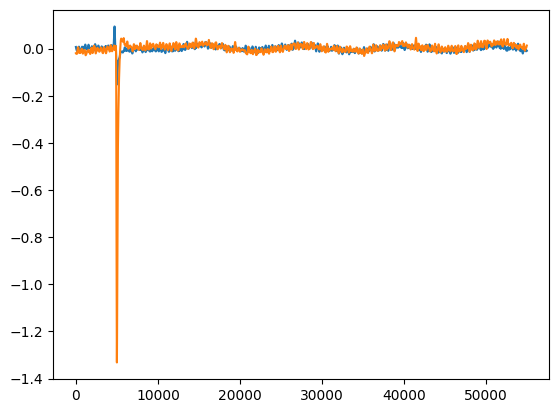

300


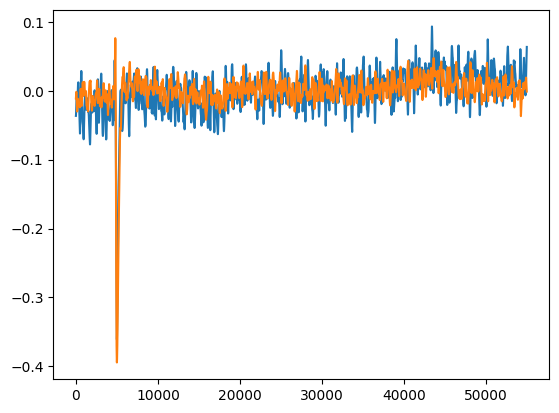

300


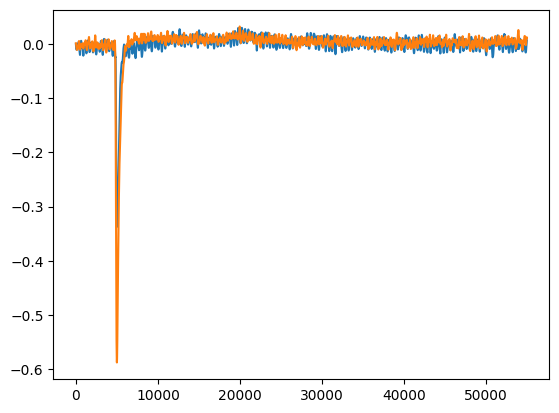

300


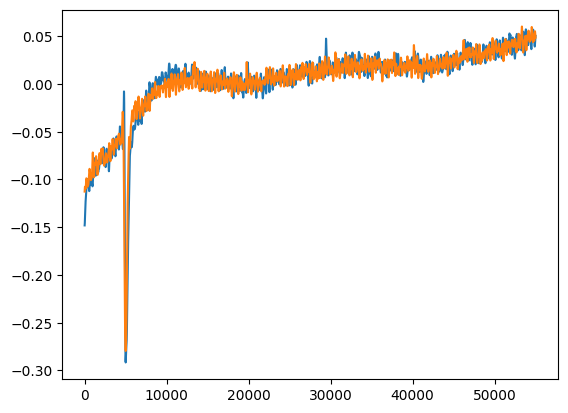

300


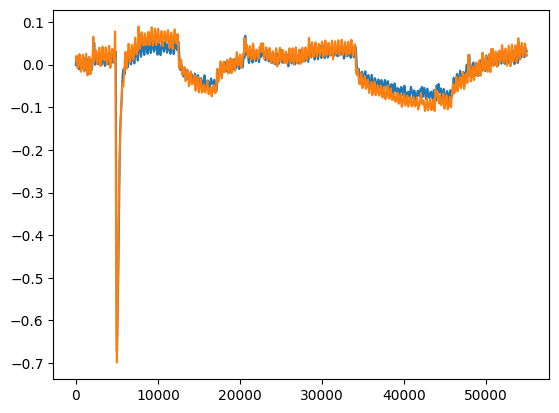

300


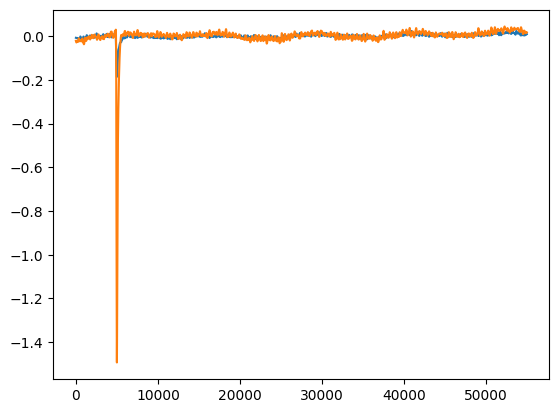

400


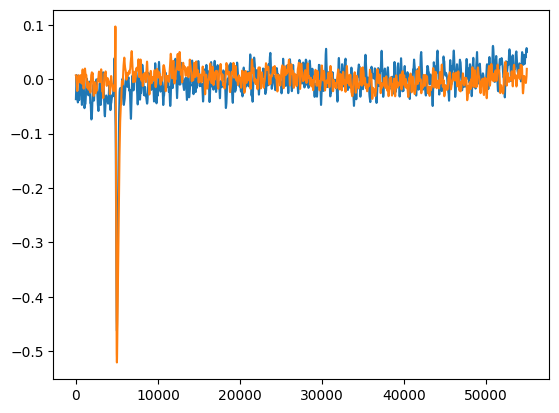

400


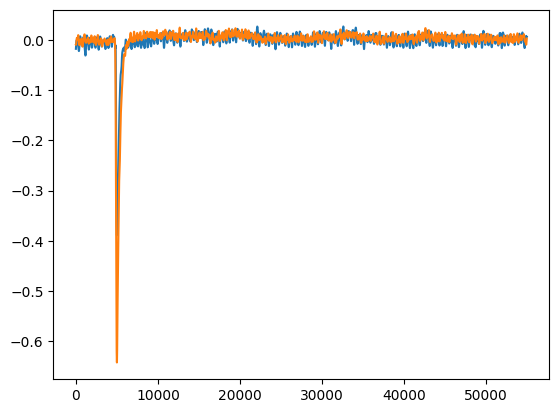

400


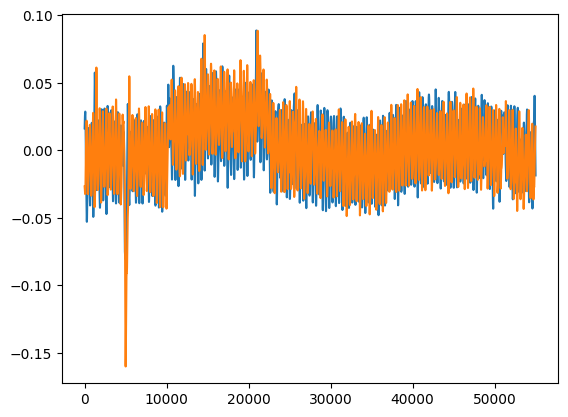

400


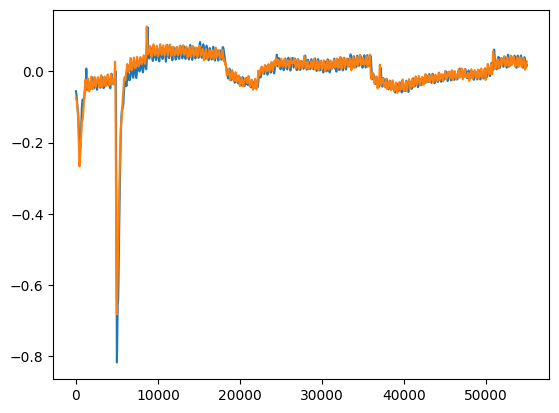

400


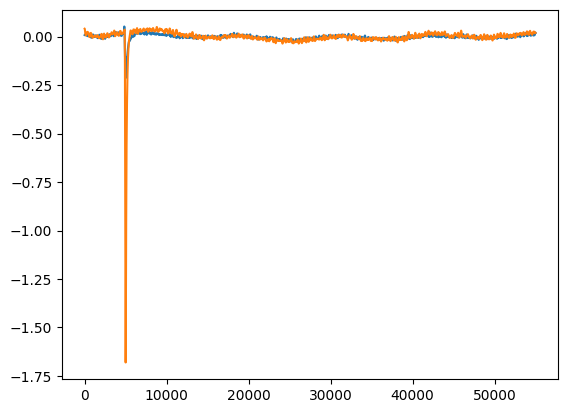

500


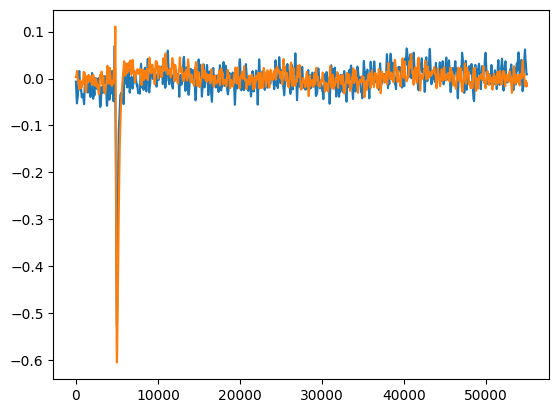

500


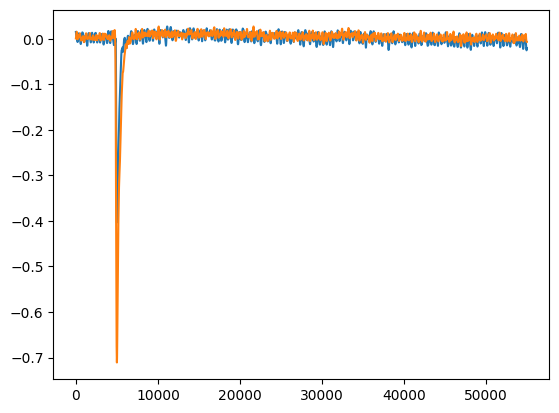

500


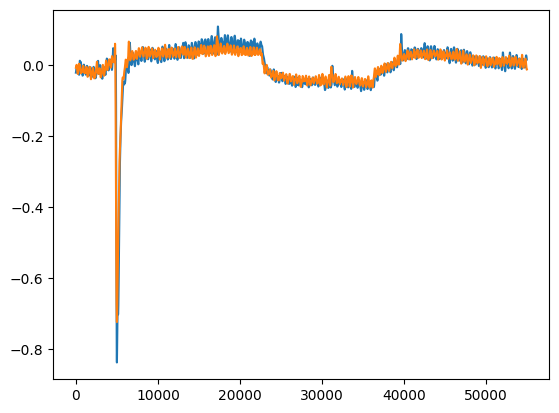

500


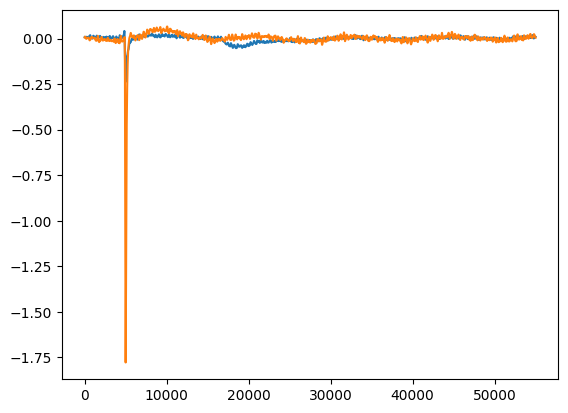

600


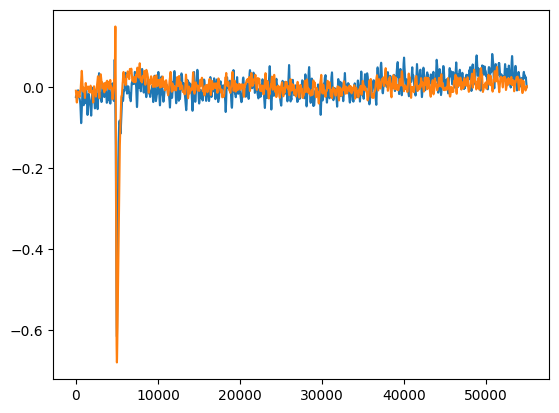

600


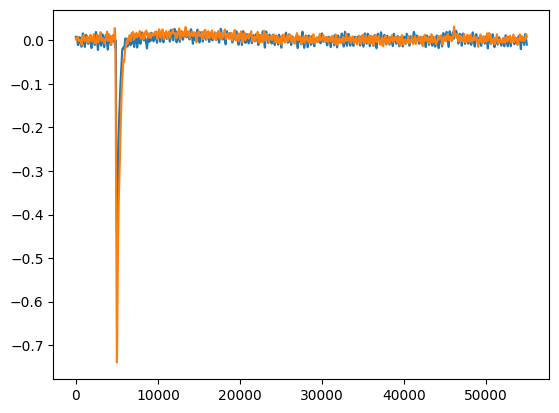

600


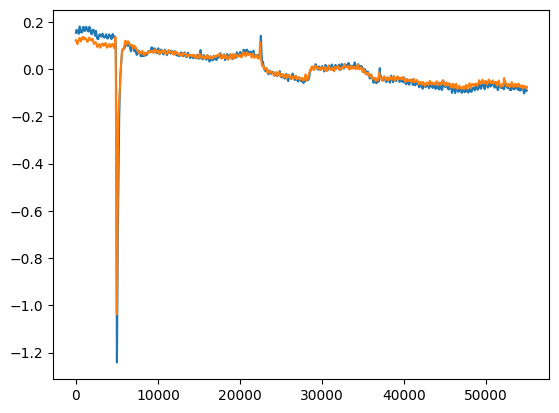

600


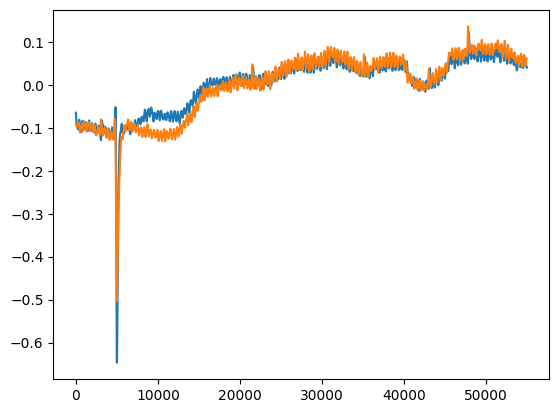

600


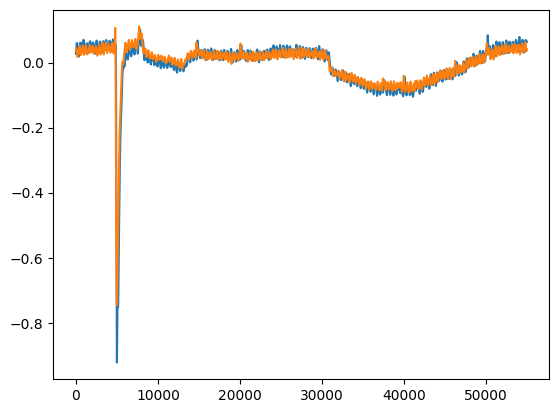

600


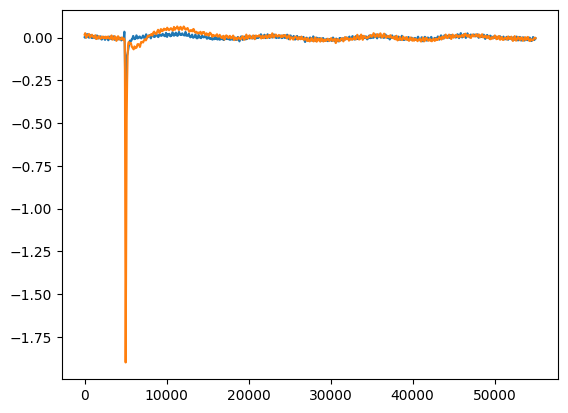

700


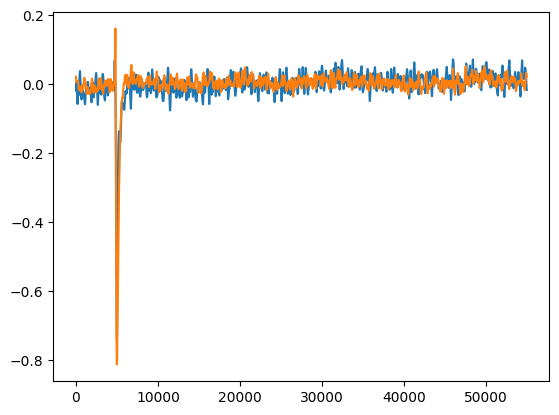

700


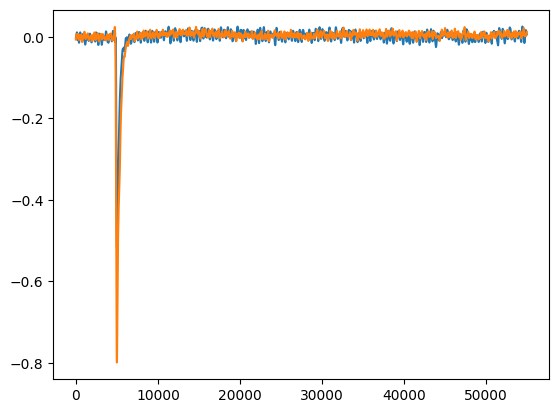

700


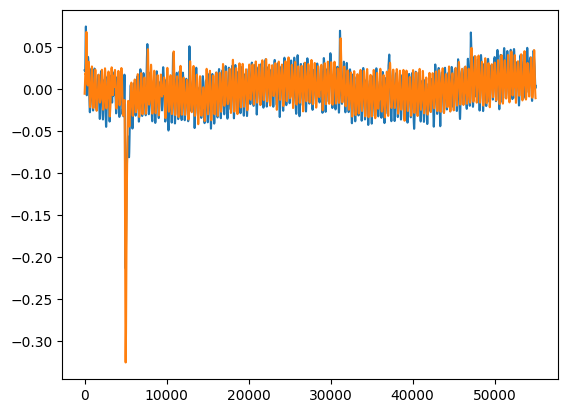

700


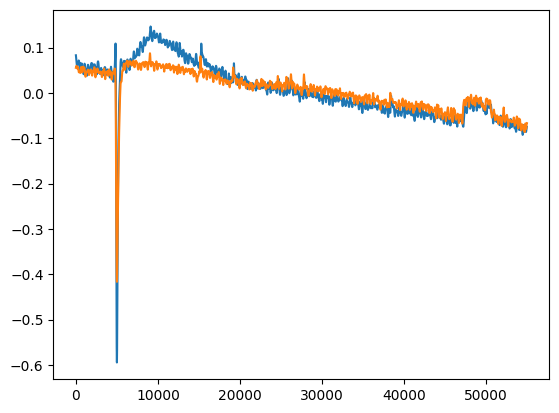

700


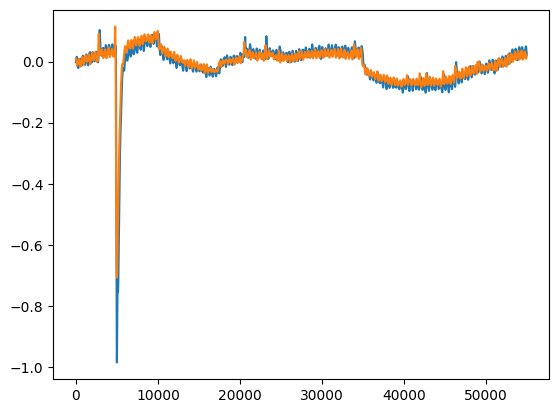

700


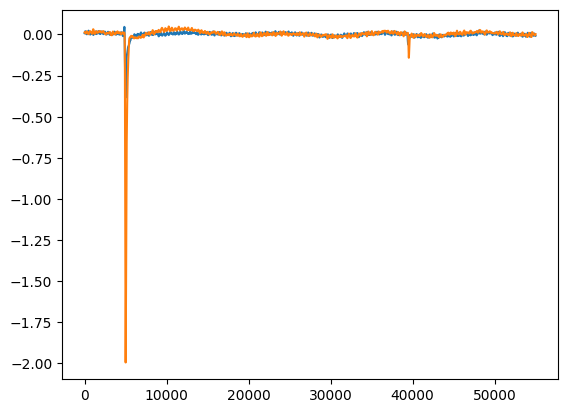

800


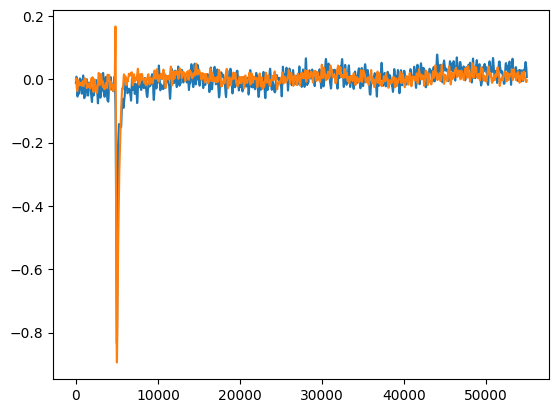

800


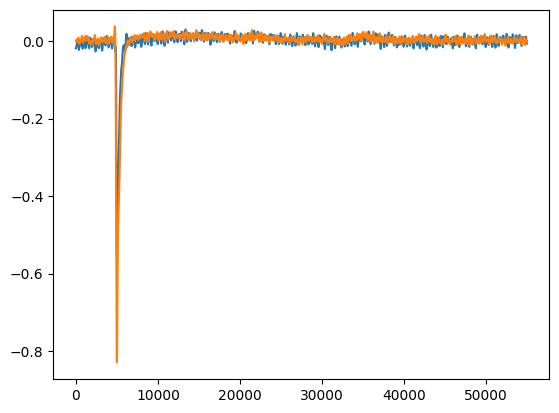

800


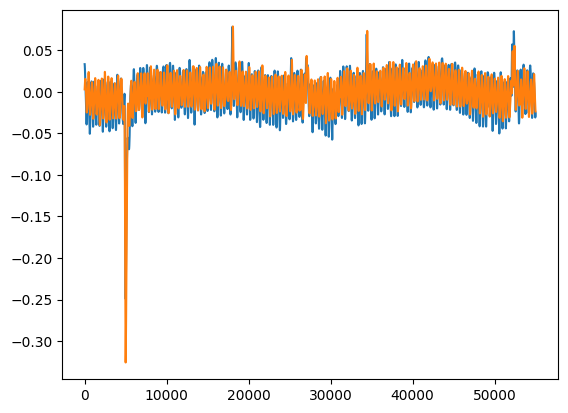

800


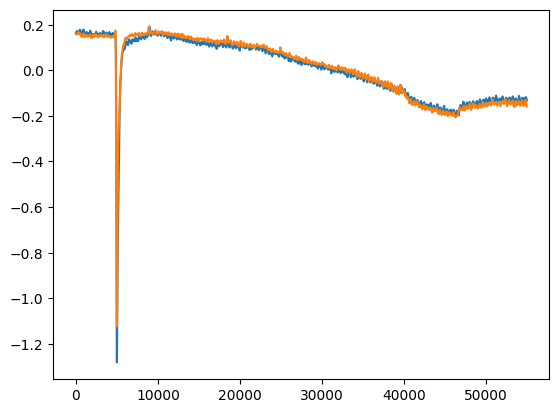

800


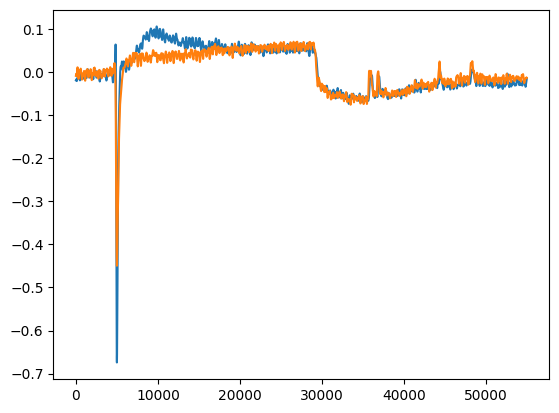

800


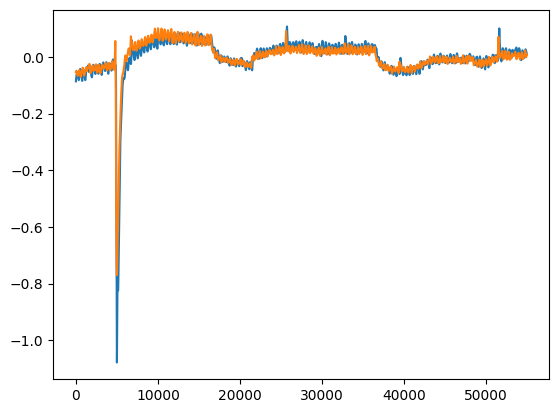

800


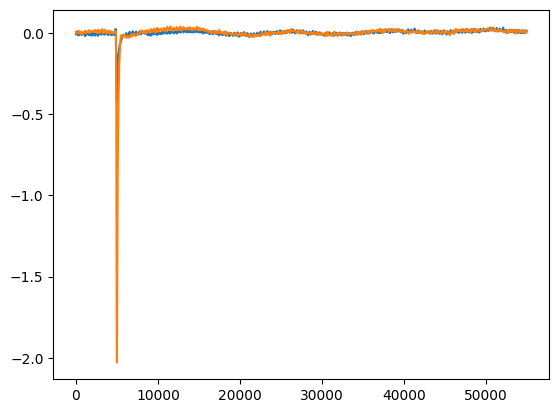

900


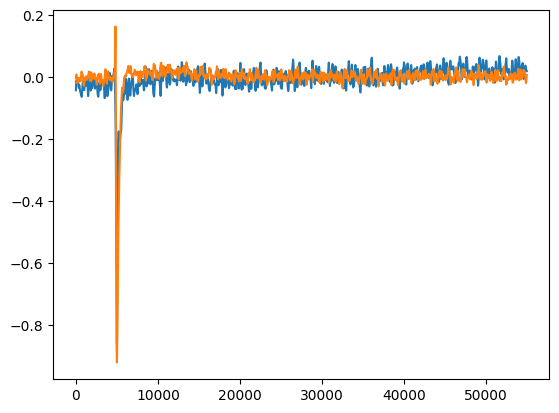

900


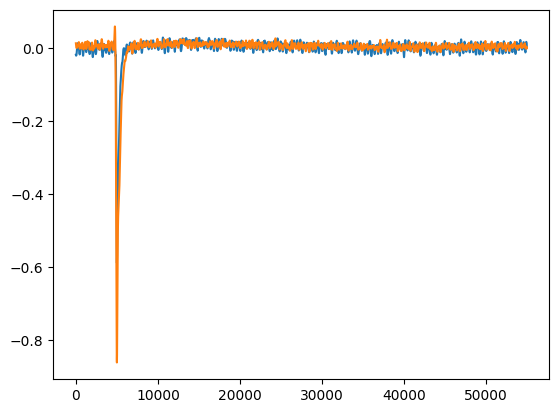

900


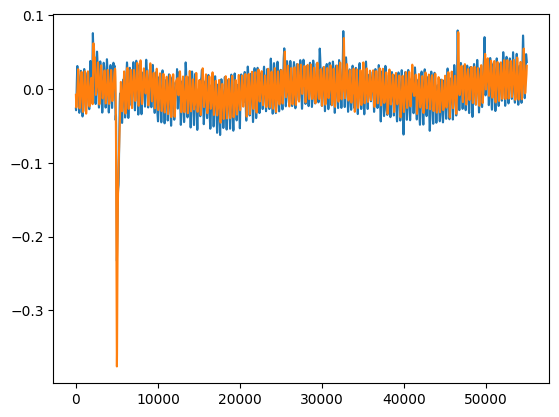

900


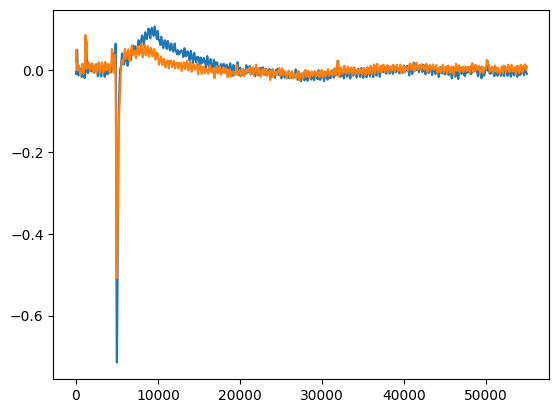

900


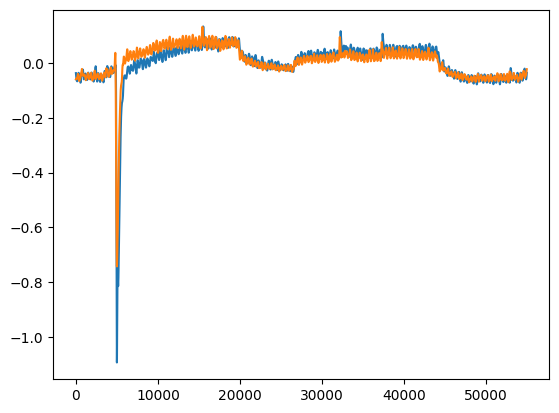

900


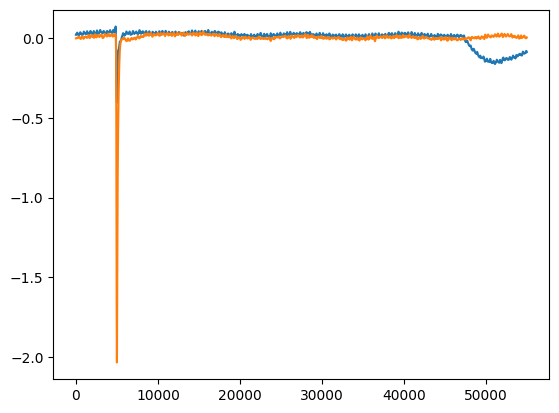

1000


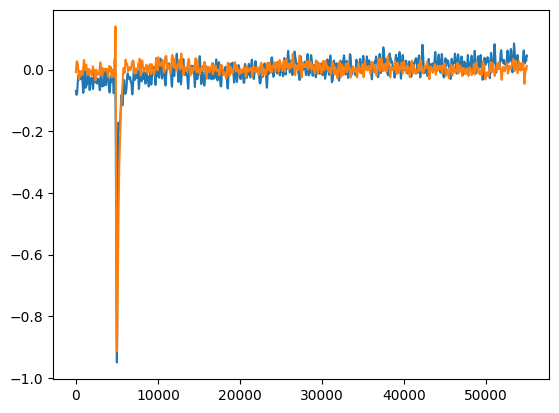

1000


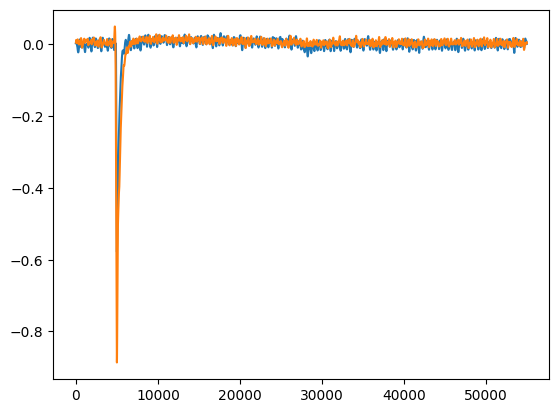

1000


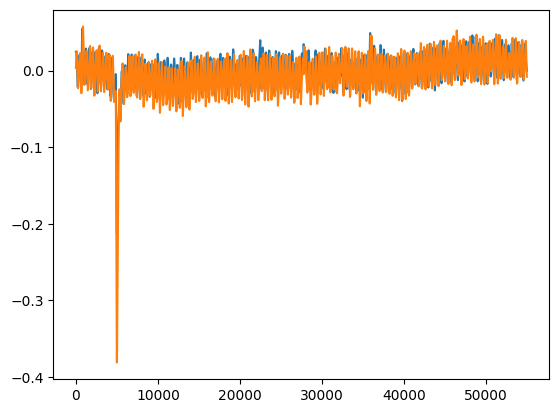

1000


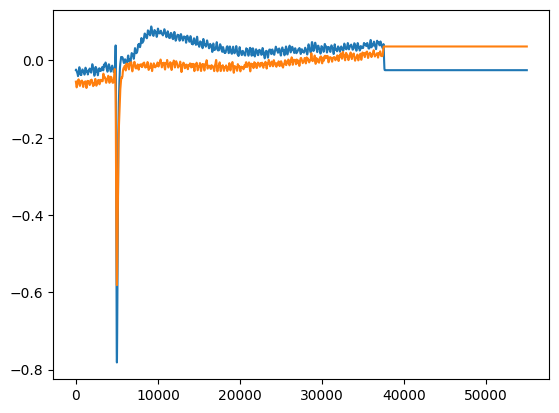

1000


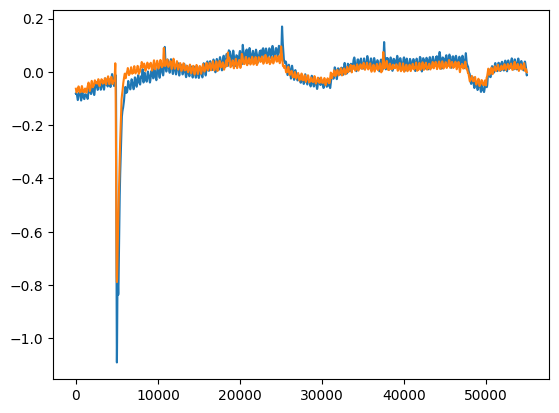

1000


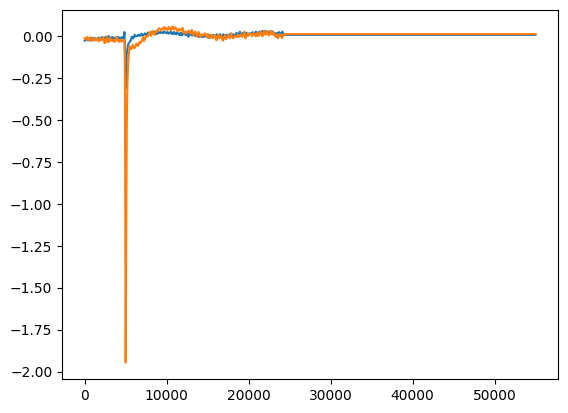

1000


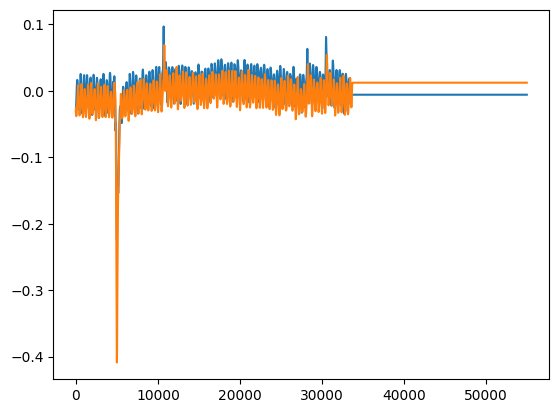

1000


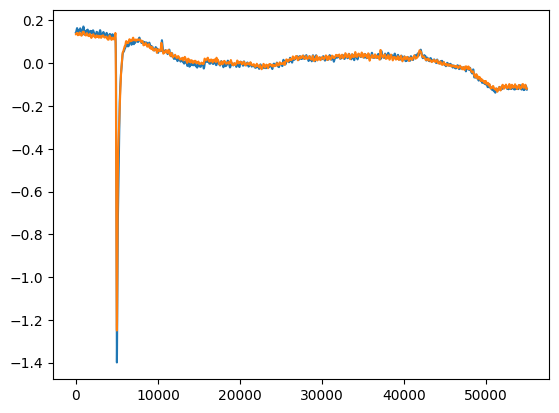

1000


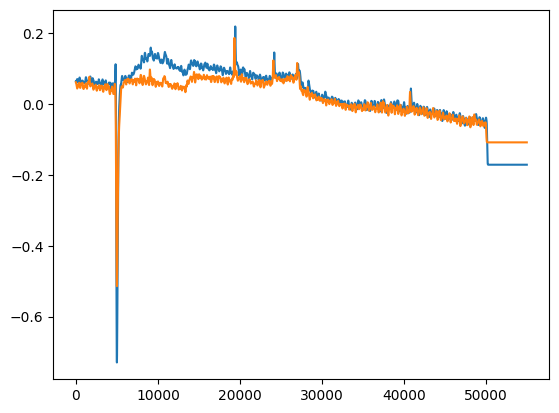

1000


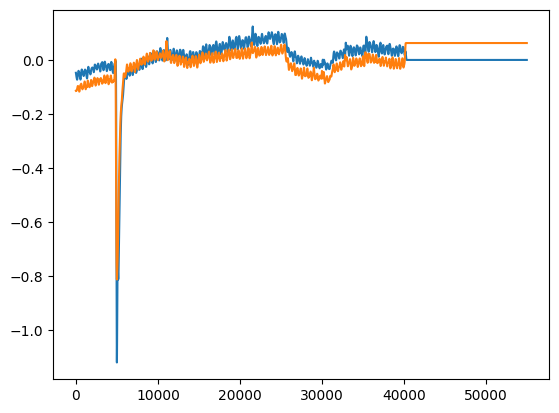

1000


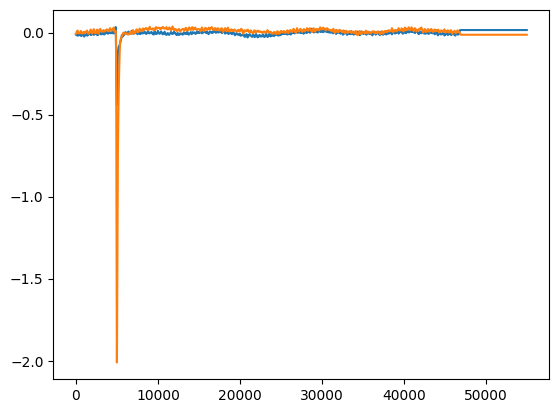

In [260]:
k=0
for amp in range(100,1001,100):
    for i in range(len(a[amp])):
        k+=1
        print(amp)
        plt.plot(a[amp][i][0])
        plt.plot(a[amp][i][1])
        plt.show()

In [193]:
k

59

In [760]:
# res = np.load("new_data.npy", allow_pickle=True)

In [65]:
# res = res.tolist()

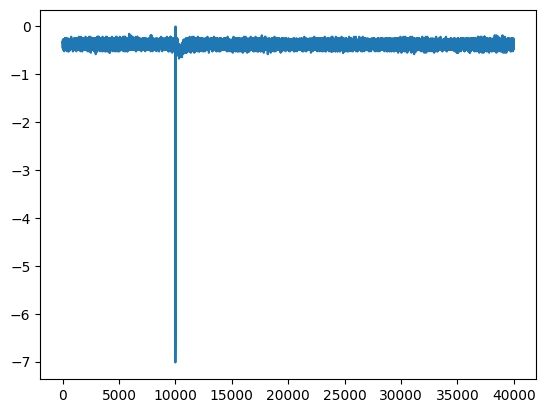

In [66]:
# plt.plot(res[100][1][1][:40000])

In [67]:
# res

{100: [array([[[-4.91333008],
          [-4.76074219],
          [-4.97436523],
          ...,
          [-4.8828125 ],
          [-4.94384766],
          [-4.85229492]],
  
         [[ 2.47192383],
          [ 2.16674805],
          [ 2.62451172],
          ...,
          [ 2.50244141],
          [ 2.34985352],
          [ 2.50244141]]]),
  array([[[-4.82177734],
          [-4.73022461],
          [-4.8828125 ],
          ...,
          [-4.82177734],
          [-4.82177734],
          [-4.73022461]],
  
         [[-0.33569336],
          [-0.45776367],
          [-0.33569336],
          ...,
          [-0.33569336],
          [-0.36621094],
          [-0.39672852]]]),
  array([[[2.16674805],
          [2.19726562],
          [2.16674805],
          ...,
          [2.16674805],
          [2.04467773],
          [2.10571289]],
  
         [[0.33569336],
          [0.36621094],
          [0.39672852],
          ...,
          [0.45776367],
          [0.45776367],
          [0.39672852]]

In [445]:
# times10 = np.load("amp_300.npy")
# times10_smooth = np.load("amp_300_smooth.npy")
# times100 = np.load("amp_300_100times.npy")
# times100_smooth = np.load("amp_300_smooth_100times.npy")
# orig = np.load("amp_300_orig.npy")

In [446]:
# print(np.min(times10), "- amp_300.npy - сжатый в 10 раз")
# print(np.min(times10_smooth), "- amp_300_smooth.npy - сжатый в 10 раз, сглаженный")
# print(np.min(times100), "- amp_300_100times.npy - сжатый в 100 раз")
# print(np.min(times100_smooth), "- amp_300_smooth_100times.npy - сжатый в 100 раз, сглаженный")
# print(np.min(orig), "- оригинальный сигнал, не сглаженный")

-0.9732095020176743 - amp_300.npy - сжатый в 10 раз
-0.9613909010773405 - amp_300_smooth.npy - сжатый в 10 раз, сглаженный
-0.8748286945812307 - amp_300_100times.npy - сжатый в 100 раз
-0.9407386920245856 - amp_300_smooth_100times.npy - сжатый в 100 раз, сглаженный
-0.973424668551008 - оригинальный сигнал, не сглаженный
